# Google Playstore Apps Analysis :
This project aims to explore and analyze a dataset of Google Play Store apps  with 799999 entries.

### Data Source
The dataset used in this project is the part1  Part1.csv.tar.gz of the dataset provided by the author Gautham Prakash on Kaggle : (https://www.kaggle.com/gauthamp10/google-playstore-apps/)
 and his GitHub repository : https://github.com/gauthamp10/Google-Playstore-Dataset.git.     
And because the data file is larger then 50MB allowed in github, I used the Large File Storage (LFS) to push
$ git lfs install
Associate the .gz file extension in the repo with Git LFS : git lfs track "*.gz" then I add, commit and Push the changes as usual.
### Data Dictionary
The dataset contains 24 columns and 799,999 records. The columns and their descriptions are as follows:

- App Name: The name of the app.
- App Id: The unique identifier of the app.
- Category: The category under which the app falls.
- Rating: The user rating of the app.
- Rating Count: The number of user ratings for the app.
- Installs: The number of installs of the app.
- Minimum Installs: The minimum number of installs required for the app to display its install count.
- Maximum Installs: The maximum number of installs of the app.
- Free: Indicates whether the app is free or not.
- Price: The price of the app in USD.
- Currency: The currency in which the app's price is listed.
- Size: The size of the app.
- Minimum Android: The minimum Android version required to use the app.
- Developer Id: The unique identifier of the app's developer.
- Developer Website: The website of the app's developer.
- Developer Email: The email address of the app's developer.
- Released: The date on which the app was released.
- Last Updated: The date on which the app was last updated.
- Content Rating: The content rating assigned to the app.
- Privacy Policy: The URL to the app's privacy policy.
- Ad Supported: Indicates whether the app displays ads or not.
- In App Purchases: Indicates whether the app contains in-app purchases or not.
- Editors Choice: Indicates whether the app has been selected as an Editor's Choice.
- Scraped Time: The date on which the data was scraped from the Play Store API.

### <u>Data Exploration :</u>


In [432]:
# Importing required libraries and modules :
import pandas as pd
import numpy as np
from pathlib import Path
import logging
import json
import matplotlib.pyplot as plt

In [433]:
# Reading data from the csv.tar.gz file :
data_path = Path('data/playstore1.csv.tar.gz')
playstore_df = pd.read_csv(data_path)
playstore_df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [434]:
# Exploring some informations about the DataFrame :
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799999 entries, 0 to 799998
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   App Name           799998 non-null  object 
 1   App Id             799999 non-null  object 
 2   Category           799999 non-null  object 
 3   Rating             792086 non-null  float64
 4   Rating Count       792086 non-null  float64
 5   Installs           799963 non-null  object 
 6   Minimum Installs   799963 non-null  float64
 7   Maximum Installs   799999 non-null  int64  
 8   Free               799999 non-null  bool   
 9   Price              799999 non-null  float64
 10  Currency           799947 non-null  object 
 11  Size               799932 non-null  object 
 12  Minimum Android    797783 non-null  object 
 13  Developer Id       799991 non-null  object 
 14  Developer Website  536705 non-null  object 
 15  Developer Email    799992 non-null  object 
 16  Re

In [435]:
# Exploring columns :
playstore_df.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')

In [436]:
# Exploring some descriptive statistics :
playstore_df.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,792086.000000,7.920860e+05,7.999630e+05,7.999990e+05,799999.000000
mean,2.203589,2.910340e+03,1.644477e+05,2.874675e+05,0.101888
std,2.106622,2.577076e+05,9.982313e+06,1.492685e+07,2.574308
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,0.000000,0.000000e+00,5.000000e+01,8.400000e+01,0.000000
50%,2.900000,6.000000e+00,5.000000e+02,6.940000e+02,0.000000
75%,4.300000,4.200000e+01,5.000000e+03,7.345000e+03,0.000000
max,5.000000,1.385576e+08,5.000000e+09,6.265638e+09,400.000000


In [437]:
# getting the Apps categories 
playstore_df['Category'].unique()

array(['Adventure', 'Tools', 'Productivity', 'Communication', 'Social',
       'Libraries & Demo', 'Lifestyle', 'Personalization', 'Racing',
       'Maps & Navigation', 'Travel & Local', 'Food & Drink',
       'Books & Reference', 'Medical', 'Puzzle', 'Entertainment',
       'Arcade', 'Auto & Vehicles', 'Photography', 'Health & Fitness',
       'Education', 'Shopping', 'Board', 'Music & Audio', 'Sports',
       'Beauty', 'Business', 'Educational', 'Finance', 'News & Magazines',
       'Casual', 'Art & Design', 'House & Home', 'Card', 'Events',
       'Trivia', 'Weather', 'Strategy', 'Word', 'Video Players & Editors',
       'Action', 'Simulation', 'Music', 'Dating', 'Role Playing',
       'Casino', 'Comics', 'Parenting'], dtype=object)

In [438]:
# Calculate the sum of Apps by 'Category'
playstore_df['Category'].value_counts().apply(lambda x: f"{x: ,d}")

Education                   83,393
Music & Audio               53,681
Tools                       49,995
Business                    49,576
Entertainment               47,876
Lifestyle                   40,986
Books & Reference           40,304
Personalization             30,802
Health & Fitness            28,852
Productivity                27,660
Shopping                    26,178
Food & Drink                25,562
Travel & Local              23,278
Finance                     22,511
Arcade                      18,624
Puzzle                      17,559
Casual                      17,382
Communication               16,644
Sports                      16,322
Social                      15,509
News & Magazines            14,780
Photography                 12,439
Medical                     10,956
Action                       9,543
Maps & Navigation            9,243
Adventure                    8,110
Simulation                   7,999
Educational                  7,275
Art & Design        

The 'Education' category has the largest number of Apps with 83393 App

In [439]:
#Get the missing records per column
playstore_df.isnull().sum().sort_values(ascending=False)

Developer Website    263294
Privacy Policy       145391
Released              24440
Rating                 7913
Rating Count           7913
Minimum Android        2216
Size                     67
Currency                 52
Installs                 36
Minimum Installs         36
Developer Id              8
Developer Email           7
App Name                  1
App Id                    0
Price                     0
Free                      0
Maximum Installs          0
Last Updated              0
Content Rating            0
Category                  0
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

The "Released" column contains the most missing data.

In [440]:
# Exloring the sum of Apps by price value :
playstore_df['Price'].value_counts().sort_values(ascending=True).apply(lambda x: f"${x:.2f}")

32.390000         $1.00
8.471034          $1.00
6.770000          $1.00
1.442580          $1.00
2.720000          $1.00
                ...    
1.490000       $1319.00
2.990000       $1355.00
1.990000       $1995.00
0.990000       $4178.00
0.000000     $784396.00
Name: Price, Length: 589, dtype: object

The most expensive App. costs $400.00

In [441]:
# Total of Apps by price value :
playstore_df['Price'].value_counts().sort_values(ascending=False).apply(lambda x: f"{x: ,d}")

0.000000      784,396
0.990000        4,178
1.990000        1,995
2.990000        1,355
1.490000        1,319
               ...   
5.342962            1
5.970000            1
34.270000           1
1.360000            1
2.302570            1
Name: Price, Length: 589, dtype: object

In [442]:
# The percentage of free Apps from the total Apps in Playstore :
price_counts = playstore_df['Price'].value_counts().sort_values(ascending=False)
price_counts_pct = price_counts / len(playstore_df) * 100 
price_counts_pct.apply(lambda x: f"%{x:.2f}")
price_counts_pct

0.000000     98.049623
0.990000      0.522251
1.990000      0.249375
2.990000      0.169375
1.490000      0.164875
               ...    
5.342962      0.000125
5.970000      0.000125
34.270000     0.000125
1.360000      0.000125
2.302570      0.000125
Name: Price, Length: 589, dtype: float64

784,396 App in Playstore are free which represent 98.04%

In [443]:
# Identifying the developer with the largest number of applications :
playstore_df['Developer Id'].value_counts().sort_values(ascending=False)

Subsplash Inc                                         1881
TRAINERIZE                                            1795
ChowNow                                               1716
Phorest                                                980
OrderYOYO                                              959
                                                      ... 
Bum Joon Lee                                             1
Cosmicode Studio                                         1
Department Of Health & Family Welfare Chhattisgarh       1
FFEN8X                                                   1
Game-era inc.                                            1
Name: Developer Id, Length: 366039, dtype: int64

The developer with the largest number of applications in Google Play Store is "Subsplash Inc" with 1881 Apps.

In [444]:

playstore_df[playstore_df['Price'] != 0]['Content Rating'].value_counts()


Everyone        14001
Teen              837
Everyone 10+      539
Mature 17+        225
Unrated             1
Name: Content Rating, dtype: int64

### <u>Data Cleaning :</u>
In the Cleaning process I will perform the following actions to prepare the dataset for analysis :

- Remove unneeded columns for the project questions : 'App Id', 'Minimum Installs', 'Installs', 'Minimum Android', 'Developer Website', 'Developer Email', 'Last Updated', 'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Scraped Time'.
- Rename column 'Maximum Installs', 'Content Rating', 'Category'
- Remove Apps with missing or invalid records from some columns
- Conveting 'Released' column to datetime format :

At the end of this process, the clened data will be saved to a new file :
 "CleanPlaystore.csv.gz" in 'Results folder.

In [445]:
# Removing unneeded columns for the project 
playstore_df.drop(['App Id', 'Minimum Installs', 'Installs', 'Minimum Android', 'Developer Website',
       'Developer Email', 'Last Updated', 'Privacy Policy', 'Ad Supported', 'In App Purchases',
       'Scraped Time'], axis=1, inplace=True)
playstore_df

,App Name,Category,Rating,Rating Count,Maximum Installs,Free,Price,Currency,Size,Developer Id,Released,Content Rating,Editors Choice
0,Gakondo,Adventure,0.0,0.0,15,True,0.0,USD,10M,Jean Confident Irénée NIYIZIBYOSE,"Feb 26, 2020",Everyone,False
1,Ampere Battery Info,Tools,4.4,64.0,7662,True,0.0,USD,2.9M,Webserveis,"May 21, 2020",Everyone,False
2,Vibook,Productivity,0.0,0.0,58,True,0.0,USD,3.7M,Cabin Crew,"Aug 9, 2019",Everyone,False
3,Smart City Trichy Public Service Vehicles 17UC...,Communication,5.0,5.0,19,True,0.0,USD,1.8M,Climate Smart Tech2,"Sep 10, 2018",Everyone,False
4,GROW.me,Tools,0.0,0.0,478,True,0.0,USD,6.2M,Rafal Milek-Horodyski,"Feb 21, 2020",Everyone,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
799994,WiFi File Transfer Pro,Tools,4.2,20088.0,480836,False,1.4,USD,748k,smarterDroid,"Jun 28, 2011",Everyone,False
799995,Disco Flashlight,Tools,3.2,15.0,3088,True,0.0,USD,1.3M,G Studio Apps,"Jul 23, 2016",Everyone,False
799996,Guess the Football Player Team || Football Quiz,Trivia,0.0,0.0,178,True,0.0,USD,28M,Dewang Bhardwaj,"Sep 23, 2020",Everyone,False
799997,Deus Hand,Tools,0.0,0.0,4,True,0.0,USD,14M,Game-era inc.,"Sep 2, 2017",Everyone,False


In [446]:
# Rename column 'Maximum Installs', 'Content Rating', 'Category'
playstore_df.rename(columns={'Content Rating': 'Audience'}, inplace=True)
playstore_df.rename(columns={'Maximum Installs': 'installs'}, inplace=True)
playstore_df.rename(columns={'Category': 'Subcategory'}, inplace=True)
playstore_df

,App Name,Subcategory,Rating,Rating Count,installs,Free,Price,Currency,Size,Developer Id,Released,Audience,Editors Choice
0,Gakondo,Adventure,0.0,0.0,15,True,0.0,USD,10M,Jean Confident Irénée NIYIZIBYOSE,"Feb 26, 2020",Everyone,False
1,Ampere Battery Info,Tools,4.4,64.0,7662,True,0.0,USD,2.9M,Webserveis,"May 21, 2020",Everyone,False
2,Vibook,Productivity,0.0,0.0,58,True,0.0,USD,3.7M,Cabin Crew,"Aug 9, 2019",Everyone,False
3,Smart City Trichy Public Service Vehicles 17UC...,Communication,5.0,5.0,19,True,0.0,USD,1.8M,Climate Smart Tech2,"Sep 10, 2018",Everyone,False
4,GROW.me,Tools,0.0,0.0,478,True,0.0,USD,6.2M,Rafal Milek-Horodyski,"Feb 21, 2020",Everyone,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
799994,WiFi File Transfer Pro,Tools,4.2,20088.0,480836,False,1.4,USD,748k,smarterDroid,"Jun 28, 2011",Everyone,False
799995,Disco Flashlight,Tools,3.2,15.0,3088,True,0.0,USD,1.3M,G Studio Apps,"Jul 23, 2016",Everyone,False
799996,Guess the Football Player Team || Football Quiz,Trivia,0.0,0.0,178,True,0.0,USD,28M,Dewang Bhardwaj,"Sep 23, 2020",Everyone,False
799997,Deus Hand,Tools,0.0,0.0,4,True,0.0,USD,14M,Game-era inc.,"Sep 2, 2017",Everyone,False


In [447]:
# Remove missing or invalid records from 'App Name', 'installs' and 'Size' columns
playstore_df.dropna(inplace=False)

,App Name,Subcategory,Rating,Rating Count,installs,Free,Price,Currency,Size,Developer Id,Released,Audience,Editors Choice
0,Gakondo,Adventure,0.0,0.0,15,True,0.0,USD,10M,Jean Confident Irénée NIYIZIBYOSE,"Feb 26, 2020",Everyone,False
1,Ampere Battery Info,Tools,4.4,64.0,7662,True,0.0,USD,2.9M,Webserveis,"May 21, 2020",Everyone,False
2,Vibook,Productivity,0.0,0.0,58,True,0.0,USD,3.7M,Cabin Crew,"Aug 9, 2019",Everyone,False
3,Smart City Trichy Public Service Vehicles 17UC...,Communication,5.0,5.0,19,True,0.0,USD,1.8M,Climate Smart Tech2,"Sep 10, 2018",Everyone,False
4,GROW.me,Tools,0.0,0.0,478,True,0.0,USD,6.2M,Rafal Milek-Horodyski,"Feb 21, 2020",Everyone,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
799994,WiFi File Transfer Pro,Tools,4.2,20088.0,480836,False,1.4,USD,748k,smarterDroid,"Jun 28, 2011",Everyone,False
799995,Disco Flashlight,Tools,3.2,15.0,3088,True,0.0,USD,1.3M,G Studio Apps,"Jul 23, 2016",Everyone,False
799996,Guess the Football Player Team || Football Quiz,Trivia,0.0,0.0,178,True,0.0,USD,28M,Dewang Bhardwaj,"Sep 23, 2020",Everyone,False
799997,Deus Hand,Tools,0.0,0.0,4,True,0.0,USD,14M,Game-era inc.,"Sep 2, 2017",Everyone,False


In [448]:
# Read the category mapping from the JSON file
with open('Data/Category.json', 'r') as f:
    category_mapping = json.load(f)

# Create a dictionary to map subcategories to categories
subcategory_to_category = {}
for category, subcategories in category_mapping.items():
    for subcategory in subcategories:
        subcategory_to_category[subcategory] = category
playstore_df.insert(playstore_df.columns.get_loc('Subcategory'), 'Category', playstore_df['Subcategory'].map(subcategory_to_category))

playstore_df

,App Name,Category,Subcategory,Rating,Rating Count,installs,Free,Price,Currency,Size,Developer Id,Released,Audience,Editors Choice
0,Gakondo,Games,Adventure,0.0,0.0,15,True,0.0,USD,10M,Jean Confident Irénée NIYIZIBYOSE,"Feb 26, 2020",Everyone,False
1,Ampere Battery Info,Education,Tools,4.4,64.0,7662,True,0.0,USD,2.9M,Webserveis,"May 21, 2020",Everyone,False
2,Vibook,Education,Productivity,0.0,0.0,58,True,0.0,USD,3.7M,Cabin Crew,"Aug 9, 2019",Everyone,False
3,Smart City Trichy Public Service Vehicles 17UC...,Communication,Communication,5.0,5.0,19,True,0.0,USD,1.8M,Climate Smart Tech2,"Sep 10, 2018",Everyone,False
4,GROW.me,Education,Tools,0.0,0.0,478,True,0.0,USD,6.2M,Rafal Milek-Horodyski,"Feb 21, 2020",Everyone,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799994,WiFi File Transfer Pro,Education,Tools,4.2,20088.0,480836,False,1.4,USD,748k,smarterDroid,"Jun 28, 2011",Everyone,False
799995,Disco Flashlight,Education,Tools,3.2,15.0,3088,True,0.0,USD,1.3M,G Studio Apps,"Jul 23, 2016",Everyone,False
799996,Guess the Football Player Team || Football Quiz,Games,Trivia,0.0,0.0,178,True,0.0,USD,28M,Dewang Bhardwaj,"Sep 23, 2020",Everyone,False
799997,Deus Hand,Education,Tools,0.0,0.0,4,True,0.0,USD,14M,Game-era inc.,"Sep 2, 2017",Everyone,False


In [449]:
# Conveting 'Released' column to datetime format :
playstore_df.loc[:, "Released"] = pd.to_datetime(playstore_df["Released"]).dt.strftime("%b %Y")
playstore_df

,App Name,Category,Subcategory,Rating,Rating Count,installs,Free,Price,Currency,Size,Developer Id,Released,Audience,Editors Choice
0,Gakondo,Games,Adventure,0.0,0.0,15,True,0.0,USD,10M,Jean Confident Irénée NIYIZIBYOSE,Feb 2020,Everyone,False
1,Ampere Battery Info,Education,Tools,4.4,64.0,7662,True,0.0,USD,2.9M,Webserveis,May 2020,Everyone,False
2,Vibook,Education,Productivity,0.0,0.0,58,True,0.0,USD,3.7M,Cabin Crew,Aug 2019,Everyone,False
3,Smart City Trichy Public Service Vehicles 17UC...,Communication,Communication,5.0,5.0,19,True,0.0,USD,1.8M,Climate Smart Tech2,Sep 2018,Everyone,False
4,GROW.me,Education,Tools,0.0,0.0,478,True,0.0,USD,6.2M,Rafal Milek-Horodyski,Feb 2020,Everyone,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799994,WiFi File Transfer Pro,Education,Tools,4.2,20088.0,480836,False,1.4,USD,748k,smarterDroid,Jun 2011,Everyone,False
799995,Disco Flashlight,Education,Tools,3.2,15.0,3088,True,0.0,USD,1.3M,G Studio Apps,Jul 2016,Everyone,False
799996,Guess the Football Player Team || Football Quiz,Games,Trivia,0.0,0.0,178,True,0.0,USD,28M,Dewang Bhardwaj,Sep 2020,Everyone,False
799997,Deus Hand,Education,Tools,0.0,0.0,4,True,0.0,USD,14M,Game-era inc.,Sep 2017,Everyone,False


##### Saving the cleaned Dataframe to a new file :

In [450]:
# Saving the cleaned Dataframe to a new file :
playstore_df.to_csv('Results\CleanPlaystore.csv.gz', index=False, compression='gzip')

### <u>Data Analysis :</u>
To better understand and interpret data, I will visualize the results and outputs of the analysis phase by creating various graphical representations. These visualizations will provide a clear and concise way of presenting the following data:

- Number of installations of the 10 most Popular Apps
- Top 10 developers with the largest number of applications.
- Monthly Count of Released Apps between Jan 2019 and Jan 2023
- Total number of 'installs' in the date range of Jan 2019 to Jan 2023
- The correlation between "installs" and "Rating"

##### * Loading and reading the clean Playstore data :

In [451]:
# Load the clean Playstore data into a dataframe :
cleanPS_path = Path('Results\CleanPlaystore.csv.gz')
cleanPS_df = pd.read_csv(cleanPS_path)
cleanPS_df.head()

,App Name,Category,Subcategory,Rating,Rating Count,installs,Free,Price,Currency,Size,Developer Id,Released,Audience,Editors Choice
0,Gakondo,Games,Adventure,0.0,0.0,15,True,0.0,USD,10M,Jean Confident Irénée NIYIZIBYOSE,Feb 2020,Everyone,False
1,Ampere Battery Info,Education,Tools,4.4,64.0,7662,True,0.0,USD,2.9M,Webserveis,May 2020,Everyone,False
2,Vibook,Education,Productivity,0.0,0.0,58,True,0.0,USD,3.7M,Cabin Crew,Aug 2019,Everyone,False
3,Smart City Trichy Public Service Vehicles 17UC...,Communication,Communication,5.0,5.0,19,True,0.0,USD,1.8M,Climate Smart Tech2,Sep 2018,Everyone,False
4,GROW.me,Education,Tools,0.0,0.0,478,True,0.0,USD,6.2M,Rafal Milek-Horodyski,Feb 2020,Everyone,False


##### * Number of installations of the 10 most Popular Apps :

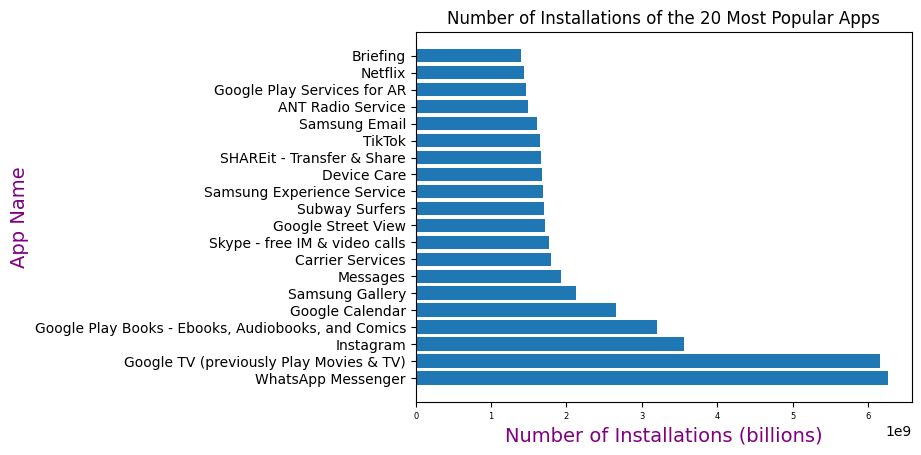

In [452]:
# Getting the Most Popular Apps
top_apps_installs = cleanPS_df.sort_values(by='installs', ascending=False).head(20)
plt.barh(top_apps_installs['App Name'], top_apps_installs['installs'])
plt.title('Number of Installations of the 20 Most Popular Apps')
plt.xlabel('Number of Installations (billions)', fontsize=14, color='purple')
plt.ylabel('App Name', fontsize=14, color='purple')
plt.xticks(rotation=0, fontsize=6)
plt.show()

WhatsApp Messenger is the Most Popular App in Google Playstore with 6,265,637,751 install.

##### * Top 10 developers with the largest number of Apps :

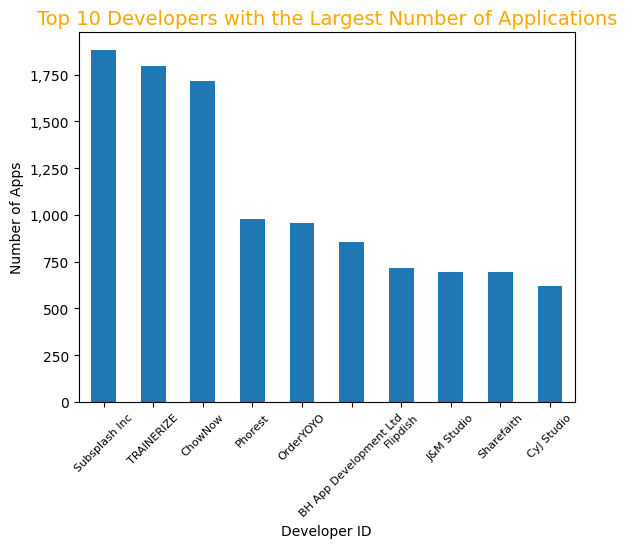

In [453]:
# Identifying the top 10 developers with the largest number of applications:
top_developers = cleanPS_df['Developer Id'].value_counts().sort_values(ascending=False).head(10)
fig = top_developers.plot(kind='bar')
fig.set_title('Top 10 Developers with the Largest Number of Applications', fontsize=14, color='orange')
fig.set_xlabel('Developer ID')
fig.tick_params(axis='x', labelsize=8)
fig.set_ylabel('Number of Apps')
fig.set_xticklabels(top_developers.index, rotation=45)
fig.yaxis.set_major_formatter('{x:,.0f}')
plt.show()

The developpers "Subsplash Inc" and "Trainerize" are the top 1 and 2 Developpers.

##### * Percentage of App Installs by Category :

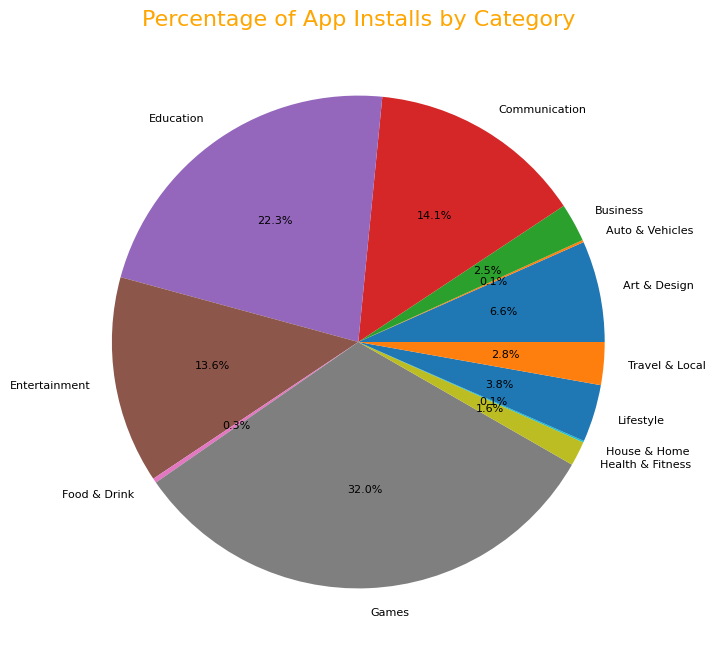

In [454]:
# Percentage of App Installs by Category :
installs_by_cat = cleanPS_df.groupby('Category')['installs'].sum().reset_index()
fig, ax = plt.subplots(figsize=(12, 8))
installs_by_cat = cleanPS_df.groupby('Category')['installs'].sum()
ax.pie(installs_by_cat.values, labels=installs_by_cat.index, autopct='%.1f%%', textprops={'fontsize': 8})
ax.set_title('Percentage of App Installs by Category', color='orange', fontsize=16)
plt.show()


"Games" make up 32% of the Apps available on the PlayStore.

##### * Monthly Count of Released Apps between Jun 2016 and Jun 2021 :

In [455]:
start_date = pd.to_datetime('Jun 2016', format='%b %Y')
end_date = pd.to_datetime('Jun 2021', format='%b %Y')
date_mask = (cleanPS_df['Released'] >= start_date) & (cleanPS_df['Released'] < end_date)
filtered_df = cleanPS_df.loc[date_mask]
released_df = filtered_df.groupby(pd.Grouper(key='Released', freq='M')).agg({'App Name': 'count'}).reset_index()
released_df

TypeError: '>=' not supported between instances of 'str' and 'Timestamp'

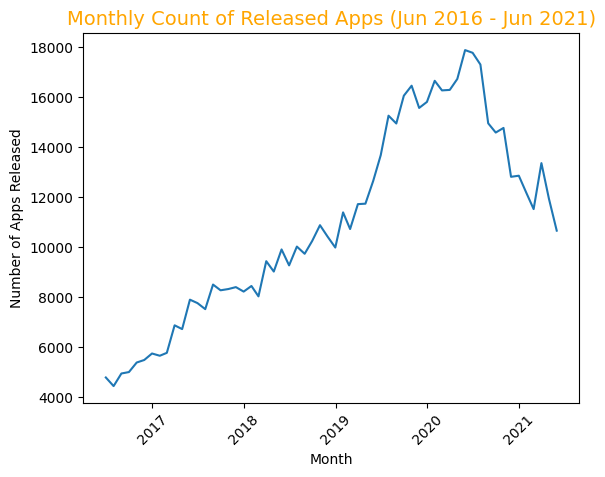

In [ ]:
# Monthly Count of Released Apps (Jun 2016 - Jun 2021)
plt.plot(released_df['Released'], released_df['App Name'])
plt.xlabel('Month')
plt.ylabel('Number of Apps Released')
plt.title('Monthly Count of Released Apps (Jun 2016 - Jun 2021)', fontsize=14, color='orange')
plt.xticks(rotation=45)
plt.show()

Between June 2016 to June 2021, the months of May, June, and July in 2020 had the highest number of monthly Apps releases.

##### * Total number of 'installs' in the date range of Jun 2016 to Jun 2021  :

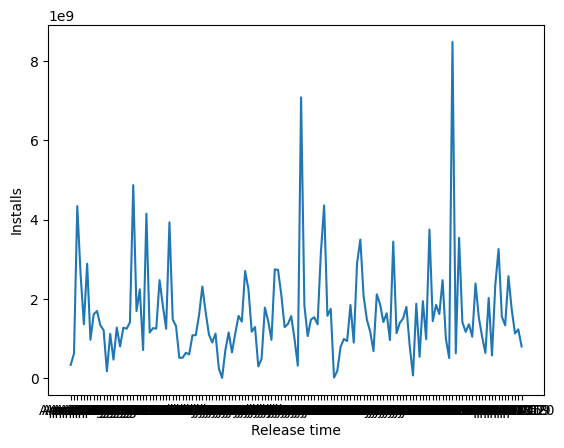

In [ ]:
# Number of installs over time 
installs_over_time = playstore_df.groupby("Released")["installs"].sum()
plt.plot(installs_over_time)
plt.xlabel("Release time")
plt.ylabel("Installs")
plt.show()


In [ ]:
plt.plot(released_df["Released"], released_df["installs"])
plt.title("Monthly Installations of Apps Released between Jun 2016 and Jun 2021", fontsize=14, color='orange')
plt.xlabel("Release Date")
plt.ylabel("Number of Installs")
plt.xticks(rotation=45)
plt.show()

KeyError: 'installs'

May, June, and July of 2020 saw the highest monthly installations of Apps released between Jun 2016 to Jun 2021.

##### * Total of 'Communication' category Apps released over time :

In [ ]:
date_mask = (cleanPS_df['Released'] >= pd.to_datetime('Jun 2016', format='%b %Y')) & (cleanPS_df['Released'] < pd.to_datetime('Jun 2021', format='%b %Y'))
start_date = pd.to_datetime("Jun 2016", format="%b %Y")
end_date = pd.to_datetime("Jun 2021", format="%b %Y")
comm_df = cleanPS_df[(cleanPS_df['Category'] == 'Communication') & (cleanPS_df['Released'] >= start_date) & (cleanPS_df['Released'] < end_date)]
comm_counts = comm_df.groupby([pd.Grouper(key="Released", freq="M")])['Category'].count()
comm_counts

TypeError: '>=' not supported between instances of 'str' and 'Timestamp'

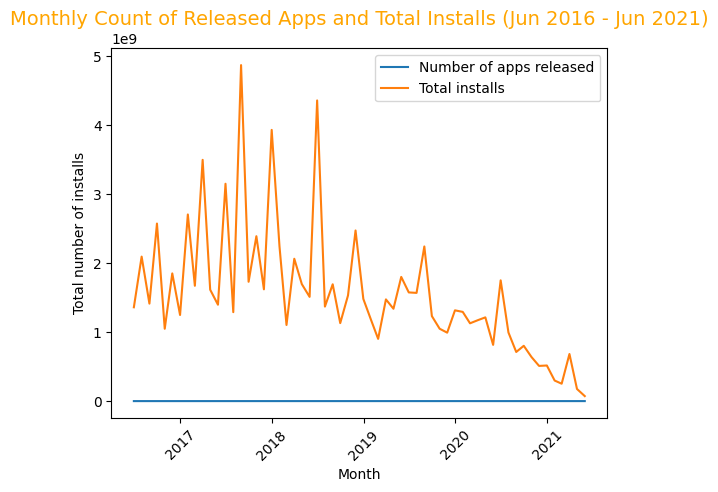

In [ ]:

# ????????????????? 
# convert 'Released' column to datetime

# filter data to date range
start_date = pd.to_datetime('Jun 2016', format='%b %Y')
end_date = pd.to_datetime('Jun 2021', format='%b %Y')
date_mask = (cleanPS_df['Released'] >= start_date) & (cleanPS_df['Released'] < end_date)
filtered_df = cleanPS_df.loc[date_mask]

# group by month and count number of releases and total installs
released_df = filtered_df.groupby(pd.Grouper(key='Released', freq='M')).agg({'App Name': 'count', 'installs': 'sum'}).reset_index()

# plot monthly count of released apps
plt.plot(released_df['Released'], released_df['App Name'], label='Number of apps released')
plt.xlabel('Month')
plt.ylabel('Number of apps released')

# plot monthly total number of installs
plt.plot(released_df['Released'], released_df['installs'], label='Total installs')
plt.ylabel('Total number of installs')

# add title and legend
plt.title('Monthly Count of Released Apps and Total Installs (Jun 2016 - Jun 2021)', fontsize=14, color='orange')
plt.xticks(rotation=45)
plt.legend()

# show the plot
plt.show()


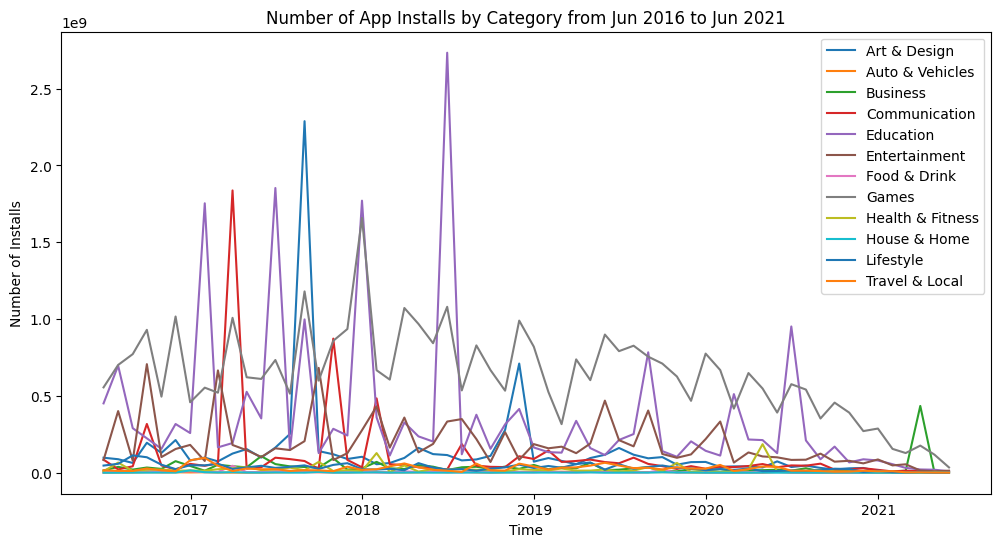

In [ ]:
cleanPS_df = cleanPS_df[(cleanPS_df['Released'] >= 'Jun 2016') & (cleanPS_df['Released'] < 'Jun 2021')]

# group data by category and sum installs
cleanPS_grouped = cleanPS_df.groupby(['Category', pd.Grouper(key='Released', freq='M')])['installs'].sum().reset_index()

# plot the data
fig, ax = plt.subplots(figsize=(12, 6))
for category in cleanPS_grouped['Category'].unique():
    ax.plot(cleanPS_grouped[cleanPS_grouped['Category'] == category]['Released'], cleanPS_grouped[cleanPS_grouped['Category'] == category]['installs'], label=category)
ax.legend()
ax.set_title('Number of App Installs by Category from Jun 2016 to Jun 2021')
ax.set_xlabel('Time')
ax.set_ylabel('Number of Installs')
plt.show()

In [ ]:
cleanPS_df.plot()
     

cleanPS_df['Category'].plot.pie()
     

cleanPS_df.plot.box()
     

cleanPS_df.plot.bar()

TypeError: '<' not supported between instances of 'str' and 'int'

Error in callback <function _draw_all_if_interactive at 0x00000255B110DA80> (for post_execute):


ValueError: Date ordinal -106155267.35000001 converts to -288674-10-01T15:35:59.998976 (using epoch 1970-01-01T00:00:00), but Matplotlib dates must be between year 0001 and 9999.

ValueError: Date ordinal -106155267.35000001 converts to -288674-10-01T15:35:59.998976 (using epoch 1970-01-01T00:00:00), but Matplotlib dates must be between year 0001 and 9999.

<Figure size 640x480 with 1 Axes>

##### * Correlation between "installs" and "Rating" :

In [ ]:
# Exploring the correlation between "installs" and "Rating"
cleanPS_df[['installs','Rating']].corr()

NameError: name 'cleanPS_df' is not defined

In [ ]:
# Visualization :
cleanPS_df[['installs','Rating']].corr()
plt.scatter(cleanPS_df['installs'], cleanPS_df['Rating'])
plt.title('Relationship between Installs and Rating', fontsize=14, color='orange')
plt.xlabel('Number of Installs')
plt.ylabel('App Rating')
plt.show()

There is a very little correlation between "installs" and "Rating". This means that changes in the number of "installs" are not affected by the "Rating" and vice versa.